Advanced Programming in Python – MiniProject #1

May Mualem 207105453

Part 1 – Object Oriented programming- Task A 

Diagram

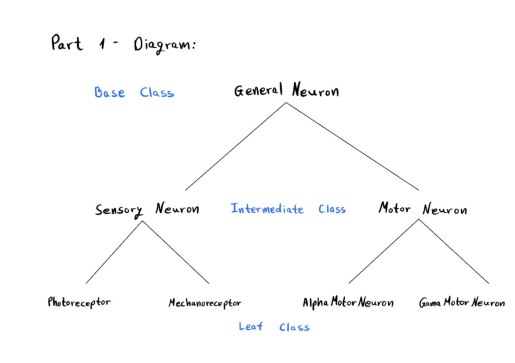

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# link to the image path
image = mpimg.imread("C:\\Users\\sharm\\Desktop\\empy_python_package\\diagram.png")

plt.imshow(image)
plt.axis('off')  #taking off the axes
plt.show()

Part 1 – Object Oriented programming
Task B 

In [22]:
# The base class - general neuron with the attribute- firing rate, and funcionality of activate- Calculate firing rate based on stimulus strength
class GeneralNeuron:
    def __init__(self, firing_rate=0):
        self.firing_rate = firing_rate  
#Calculate firing rate based on stimulus strength    
    def activate(self, stimulus_strength):
        pass


# The first intermediate class- Sensory Neuron with the attribute- receptor type, and functionality of sense stimulus 
class SensoryNeuron(GeneralNeuron):
    def __init__(self, firing_rate=0, receptor_type=""):
        super().__init__(firing_rate)
        self.receptor_type = receptor_type  
#Process specific stimulus and activate the neuron
    def sense_stimulus(self, stimulus):
        pass


# The second intermediate class- Motor Neuron with the attribute- target mascle, and functionality of control muscle
class MotorNeuron(GeneralNeuron):
    def __init__(self, firing_rate=0, target_muscle=""):
        super().__init__(firing_rate)
        self.target_muscle = target_muscle
# Trigger response in the target muscle based on activation level          
    def control_muscle(self):
        pass


# The first leaf class of sensory neuron- Photoreceptor with the attribute- receptor type= light, and functionality of light detection
class Photoreceptor(SensoryNeuron):
    def __init__(self, firing_rate=0):
        super().__init__(firing_rate, receptor_type="light")  
#Override: Increase firing rate based on light intensity
    def sense_stimulus(self, light_intensity):
        pass


# The second leaf class of sensory neuron- Mechanoreceptor with the attribute- receptor type= pressure, and functionality of pressure detection
class Mechanoreceptor(SensoryNeuron):
    def __init__(self, firing_rate=0):
        super().__init__(firing_rate, receptor_type="pressure")  
#Override: Activate neuron based on pressure level
    def sense_stimulus(self, pressure_level):
        pass


# The first leaf class of motor neuron- Alpha motor neuron with the attribute- target muscle= "skeletal muscle" , and functionality of skeletal muscle control
class AlphaMotorNeuron(MotorNeuron):
    def __init__(self, firing_rate=0):
        super().__init__(firing_rate, target_muscle="skeletal muscle")  
# Override: Trigger strong and rapid contraction in skeletal muscle
    def control_muscle(self):
        pass


# The second leaf class of motor neuron- Gamma motor neuron with the attribute- target muscle= "muscle spindle" , and functionality of muscle spindle control
class GammaMotorNeuron(MotorNeuron):
    def __init__(self, firing_rate=0):
        super().__init__(firing_rate, target_muscle="muscle spindle")  
# Override: Adjust muscle spindle tension gradually
    def control_muscle(self):
        """Override: Adjust muscle spindle tension gradually"""
        pass

Part 2 – NumPy, Pandas, MatPlotLib- Q1

In [23]:
!pip install numpy matplotlib


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


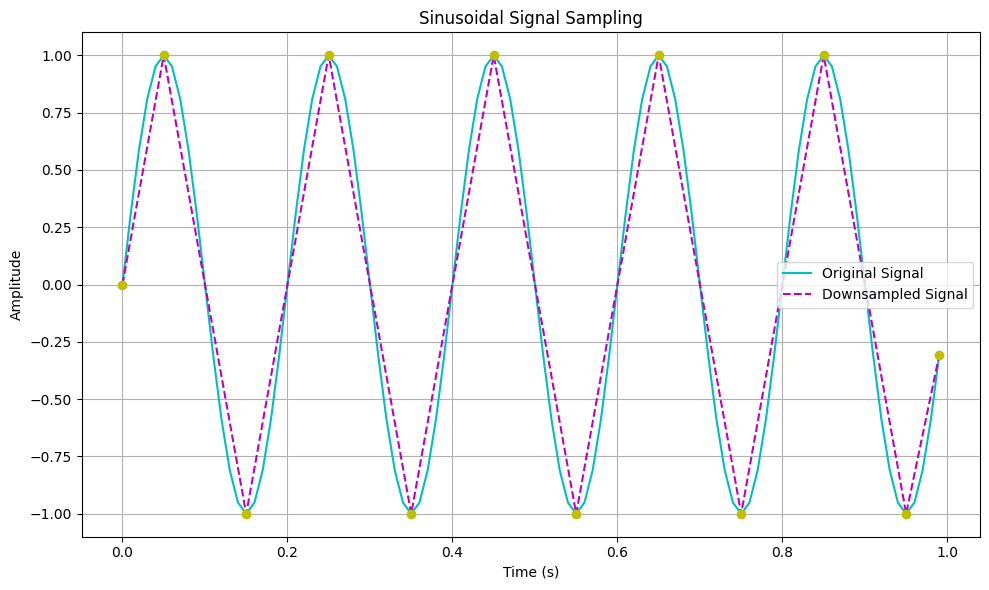

Original signal length: 100
Downsampled signal length: 21


In [40]:
import numpy as np
import matplotlib.pyplot as plt

def sample_signal(signal, t):
   """Samples a sinusoidal signal while preserving maxima and minima.
   Args: signal-Input sinusoidal signal,  t : Time array corresponding to the signal. 

   the function eill return-
   downsampled_t : Downsampled time array.
   downsampled_signal : Downsampled signal.
   special_indices : Indices of maxima, minima, and zero-crossings.
   """
    # Find the  maximum points
   max_points = np.where(np.r_[True, signal[1:] > signal[:-1]] & np.r_[signal[:-1] > signal[1:], True])[0]
    # Find the minimum points
   min_points = np.where(np.r_[True, signal[1:] < signal[:-1]] & np.r_[signal[:-1] < signal[1:], True])[0]

    # Combine all the extrema points
   special_points = np.sort(np.unique(np.concatenate([max_points, min_points])))

    # Downsample by selecting every 5th point and ensuring all special points are included
   downsample_indices = np.unique(np.concatenate([special_points, np.arange(0, len(signal), 5)]))

   return t[downsample_indices], signal[downsample_indices], special_points

# Generate original sinusoidal signal
# Time from 0 to 1 with 0.01 steps
t = np.arange(0, 1, 0.01)
# Sine wave with 5 Hz frequency
signal = np.sin(2 * np.pi * 5 * t)

# Downsample the signal
downsampled_t, downsampled_signal, special_points = sample_signal(signal, t)
# creatinr plot
plt.figure(figsize=(10, 6))
plt.plot(t, signal, 'c-', label='Original Signal')
plt.plot(downsampled_t, downsampled_signal, 'm--', label= 'Downsampled Signal' )
plt.plot(t[special_points], signal[special_points], 'yo')
plt.title('Sinusoidal Signal Sampling')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Original signal length: {len(signal)}")
print(f"Downsampled signal length: {len(downsampled_signal)}")


In [25]:
!pip install pandas


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Part 2 – NumPy, Pandas, MatPlotLib- Q2

Plot of the price of all the laptops

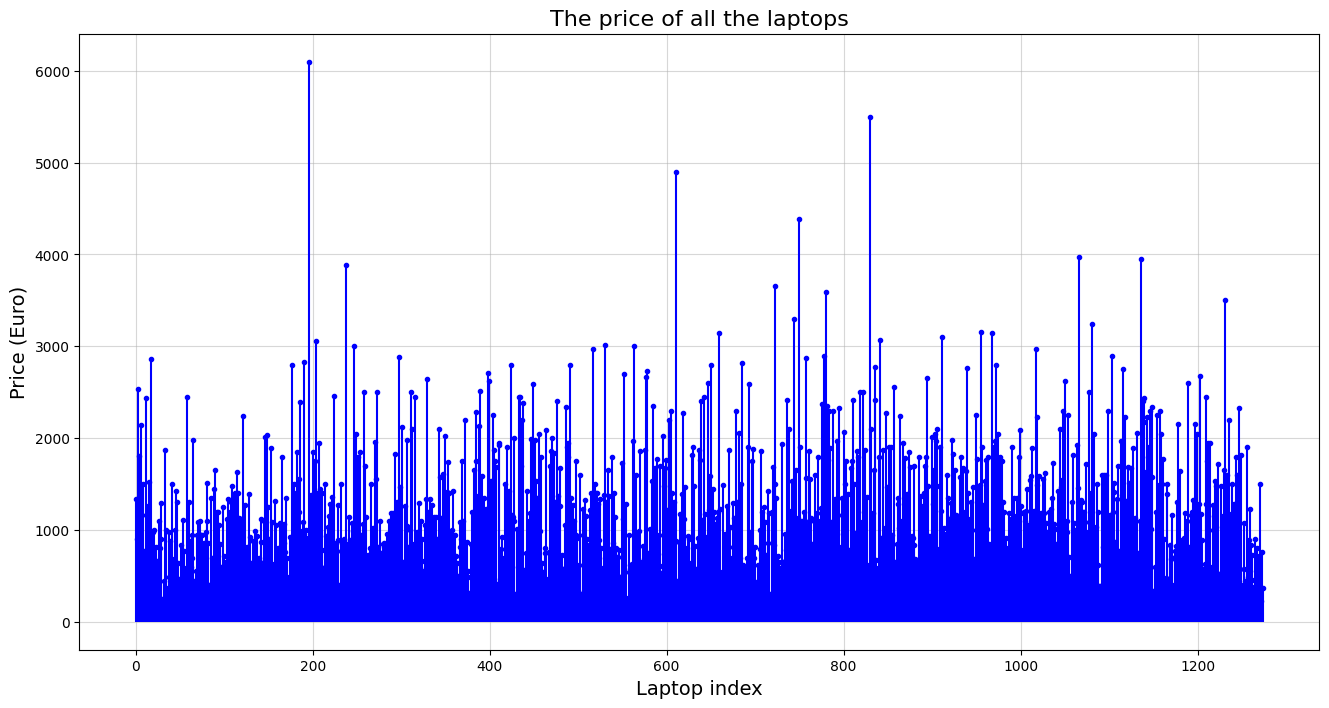

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
#reading the file of the data
os.chdir("C:\\Users\\sharm\\Desktop\\empy_python_package") 
file_path = "C:\\Users\\sharm\\Desktop\\empy_python_package\\laptop_price - dataset.csv"
df = pd.read_csv(file_path)


#making a plot of the price of all the laptops include font size of the titles, the names of the titles, colors.
plt.figure(figsize=(16, 8))  
plt.stem(df['Price (Euro)'], linefmt='blue', markerfmt='.', basefmt=" ")
plt.title("The price of all the laptops", fontsize=16)
plt.xlabel("Laptop index", fontsize=14)
plt.ylabel("Price (Euro)", fontsize=14)
plt.grid(alpha=0.5)
plt.show()

Part 2 – NumPy, Pandas, MatPlotLib- Q2

Which company has on average the most expensive laptop? What is the average
laptop price for each company?

The company with the most expensive laptops on average is Razer with an average price of 3346.14 USD.
Average laptop price for each company:
Company
Razer        3346.142857
LG           2099.000000
MSI          1728.908148
Google       1677.666667
Microsoft    1612.308333
Apple        1564.198571
Huawei       1424.000000
Samsung      1413.444444
Toshiba      1267.812500
Dell         1199.225120
Xiaomi       1133.462500
Asus         1123.829737
Lenovo       1093.862215
HP           1080.314664
Fujitsu       729.000000
Acer          633.464455
Chuwi         314.296667
Mediacom      295.000000
Vero          217.425000
Name: Price (Euro), dtype: float64


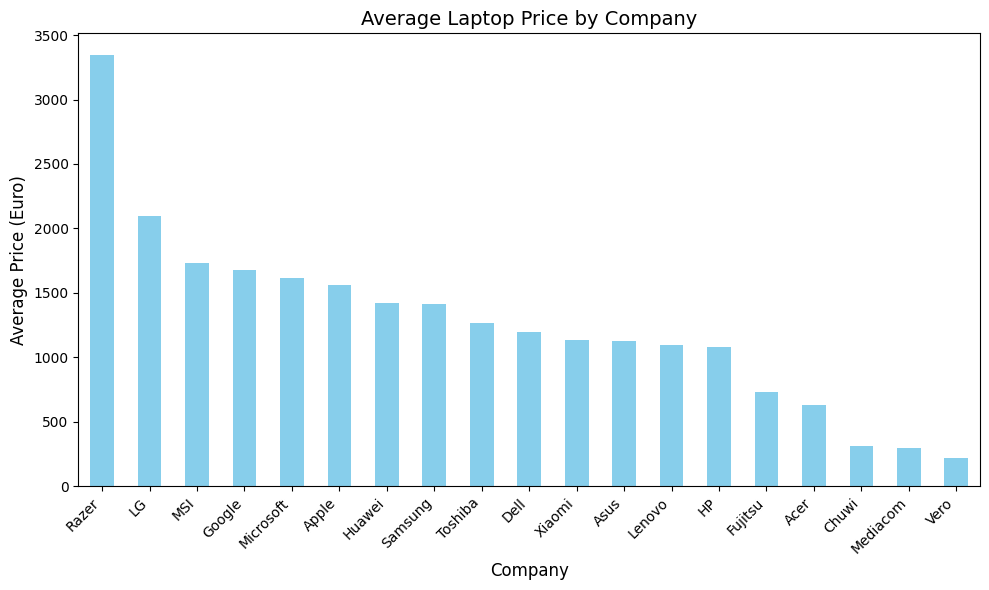

In [42]:
# calculate the average price to each company
average_prices = df.groupby('Company')['Price (Euro)'].mean().sort_values(ascending=False)

#finding the most expensive company
most_expensive_company = average_prices.idxmax()
highest_avg_price = average_prices.max()

print(f"The company with the most expensive laptops on average is {most_expensive_company} with an average price of {highest_avg_price:.2f} USD.")
print("Average laptop price for each company:")
print(average_prices)

# making the bar plot of the average price of each company
plt.figure(figsize=(10, 6))
average_prices.plot(kind='bar', color='skyblue')

# Adding font size ,title and labels
plt.title('Average Laptop Price by Company', fontsize=14)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Average Price (Euro)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

Part 2 – NumPy, Pandas, MatPlotLib- Q2

Operating systems 

In [43]:
# making all the names of the systems with small letters and without extra spaces
df['OpSys'] = df['OpSys'].str.strip().str.lower()


# creating a dictionary of the uniqe names that include all the original names
opsys_mapping = {
    'windows': 'Windows',
    'windows 10': 'Windows',
    'windows 10 s': 'Windows',
    'windows 7': 'Windows',
    'macos': 'MacOS',
    'mac': 'MacOS',
    'mac os x': 'MacOS',
    'linux': 'Linux',
    'android': 'Android',
    'chrome': 'Chrome OS',
    'chrome os': 'Chrome OS',
    'no os': 'No OS'
}

#changing all the names in the data according to the dictionary
df['OpSys'] = df['OpSys'].replace(opsys_mapping)

# printing all the operating systems after the union
unique_opsys_cleaned = df['OpSys'].unique()
print("Unique operating systems after cleaning:", unique_opsys_cleaned)


Unique operating systems after cleaning: ['MacOS' 'No OS' 'Windows' 'Linux' 'Android' 'Chrome OS']


Part 2 – NumPy, Pandas, MatPlotLib- Q2

Price Distribution by Operating System Types

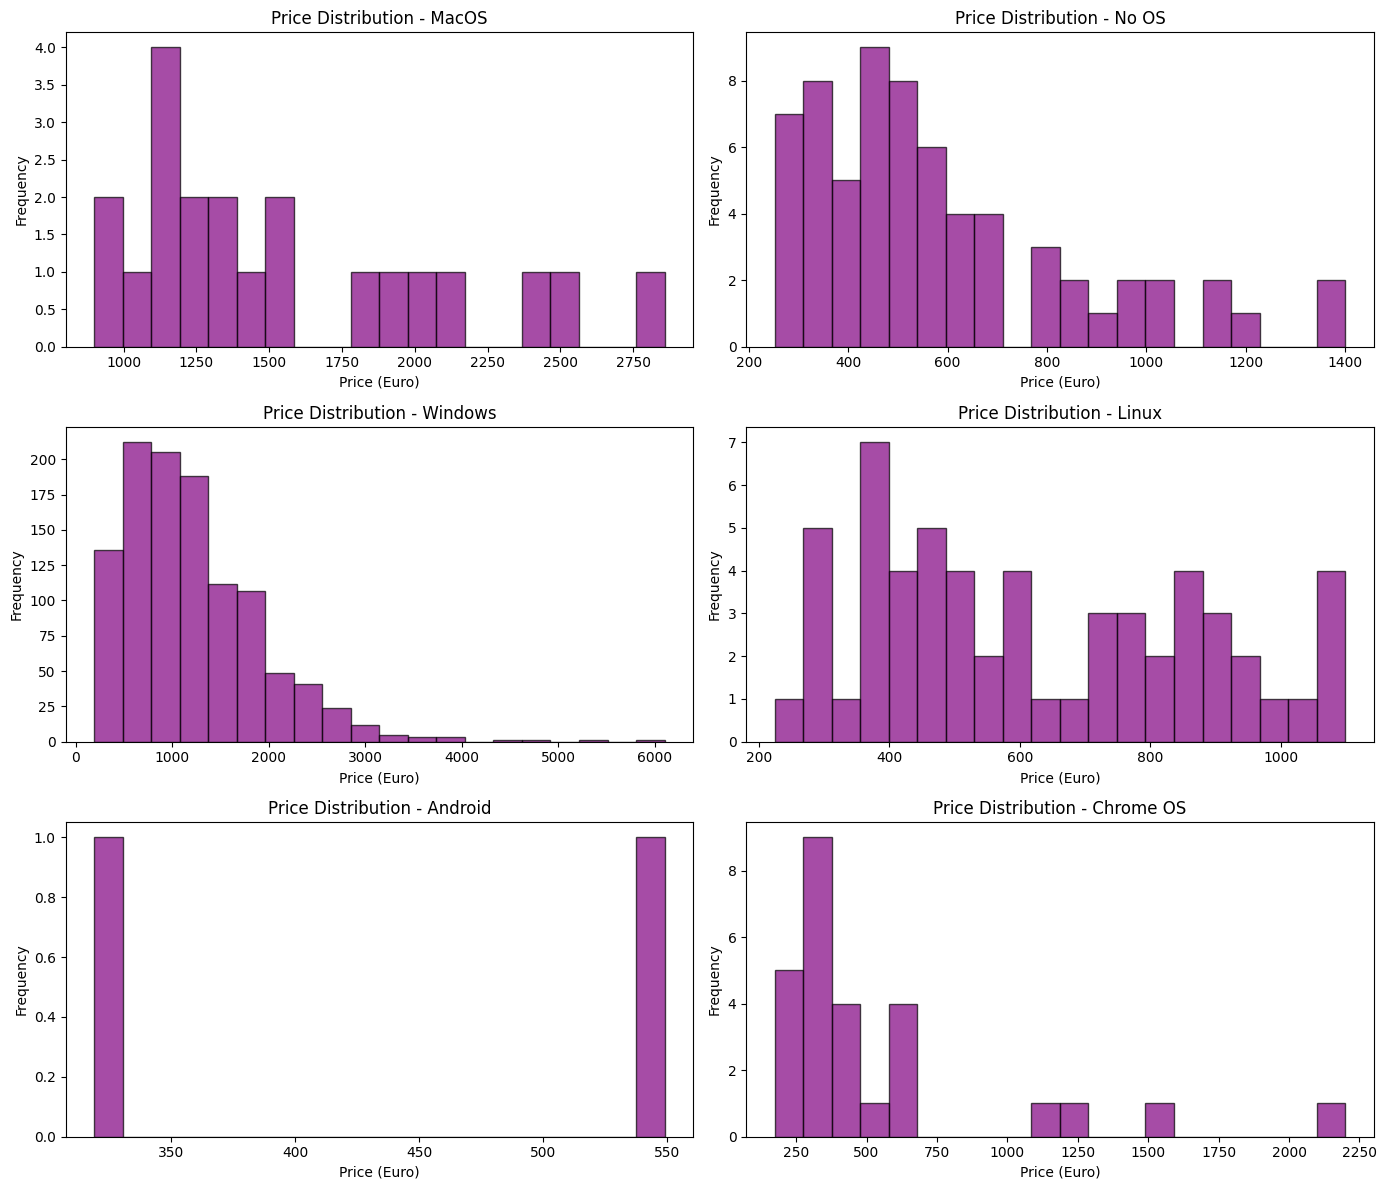

In [44]:

# using the unique operating systems
unique_opsys_cleaned = df['OpSys'].unique()
#calculate the numbers of rows for the graphs
num_rows = len(unique_opsys_cleaned) // 2 + len(unique_opsys_cleaned) % 2 # 2 graphs in a row
# making empty graphs
plt.figure(figsize=(14, 4 * num_rows))

#making the graphs for each operating system include font size, color, titles
for i, os in enumerate(unique_opsys_cleaned):
    plt.subplot(num_rows, 2, i + 1)  # define the place of each graph
    subset = df[df['OpSys'] == os]['Price (Euro)']
    plt.hist(subset, bins=20, color="purple", edgecolor="black", alpha=0.7)
    plt.title(f"Price Distribution - {os}")
    plt.xlabel("Price (Euro)")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

Part 2 – NumPy, Pandas, MatPlotLib- Q2

The relationship between RAM and computer price

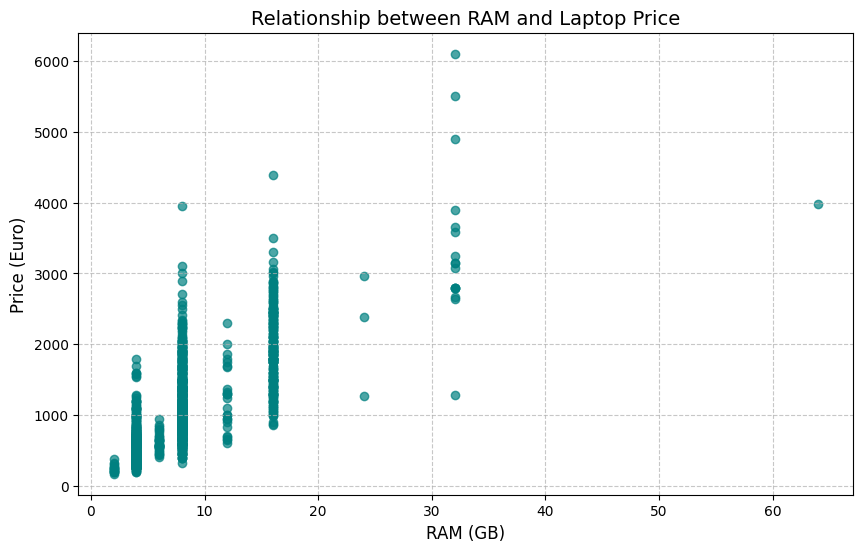

The correlation between RAM and Price is: 0.74


In [45]:
# scatter plot that shows the connection between RAM and the laptop price
plt.figure(figsize=(10, 6))
plt.scatter(df['RAM (GB)'], df['Price (Euro)'], color='teal', alpha=0.7)
plt.title("Relationship between RAM and Laptop Price", fontsize=14)
plt.xlabel("RAM (GB)", fontsize=12)
plt.ylabel("Price (Euro)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# calculate the correlation between the RAM and the price
correlation = df['RAM (GB)'].corr(df['Price (Euro)'])
print(f"The correlation between RAM and Price is: {correlation:.2f}")

We can see that the correlation is positive and strong (0.74), indicating that as the RAM of a computer increases, its price tends to increase as well.  

Part 2 – NumPy, Pandas, MatPlotLib- Q2

"Storage type"

In [46]:
#function that return the storage type according to the memory column in the data file
def extract_storage_type(memory_str):
    #changing all the memory column with small letters
    memory_str = memory_str.lower()

    # checking every possible of storage type
    if 'hdd' in memory_str and 'ssd' in memory_str:
        return 'HDD + SSD'
    elif memory_str.count('hdd') > 1:
        return 'HDD + HDD'
    elif 'hdd' in memory_str and 'flash' in memory_str:
        return 'HDD + Flash Storage'
    elif 'ssd' in memory_str and 'hybrid' in memory_str:
        return 'SSD + Hybrid'
    elif 'ssd' in memory_str:
        return 'SSD'
    elif 'hdd' in memory_str:
        return 'HDD'
    elif 'flash' in memory_str:
        return 'Flash Storage'
    elif 'hybrid' in memory_str:
        return 'Hybrid'
    else:
        return 'Other'

# making a new column with the function Storage_Type 
df['Storage_Type'] = df['Memory'].apply(extract_storage_type)

#summery of all the numbers of each storage type
print("\nCount of each storage type:")
print(df['Storage_Type'].value_counts())

#showing the new column
print("\nStorage_Type column:")
print(df['Storage_Type'])

# define showing all the rows cause there are a lot of them
pd.set_option('display.max_rows', None)  
print(df['Storage_Type'])



Count of each storage type:
Storage_Type
SSD                    635
HDD                    358
HDD + SSD              200
Flash Storage           70
Hybrid                   8
SSD + Hybrid             2
HDD + Flash Storage      1
HDD + HDD                1
Name: count, dtype: int64

Storage_Type column:
0                       SSD
1             Flash Storage
2                       SSD
3                       SSD
4                       SSD
5                       HDD
6             Flash Storage
7             Flash Storage
8                       SSD
9                       SSD
10                      HDD
11                      HDD
12                      SSD
13                      SSD
14                      SSD
15                      SSD
16                      SSD
17                      SSD
18                      HDD
19                      SSD
20            Flash Storage
21                HDD + SSD
22                      HDD
23                      SSD
24                    

###Bonus question

1. Is there a relationship between the laptop's weight and its price?
Analysis: Calculate the correlation (Pearson correlation coefficient) between the 'Weight (kg)' and 'Price (Euro)' columns.
Visualization: Scatter plot with a linear trend line.
2. What is the laptop type with the lowest average weight?
Analysis: Calculate the average weight for each laptop type (based on the 'TypeName' column).
Visualization: Bar chart comparing the average weights across laptop type.
3. How does the screen size (Inches) affect the price?
Analysis: Calculate the average prices for different screen sizes.
Visualization: Line plot showing the average prices for each screen size.
4. How does the operating system (OpSys) affect the average laptop price?
Analysis: Calculate the average price for each operating system type.
Visualization: Bar chart comparing the average prices across operating systems.
5. Which laptop type (TypeName) offers the largest RAM on average?
Analysis: Calculate the average RAM for each laptop type.
Visualization: Bar chart comparing the average RAM across laptop types.
6. What is the effect of storage type (Storage_Type) on the average price?
Analysis: Calculate the average price for each storage type.
Visualization: Bar chart.


In [35]:
!pip install seaborn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Q1- What is the laptop type with the lowest average weight?

The laptop type with the lowest average weight is: Netbook with an average weight of 1.32 kg.


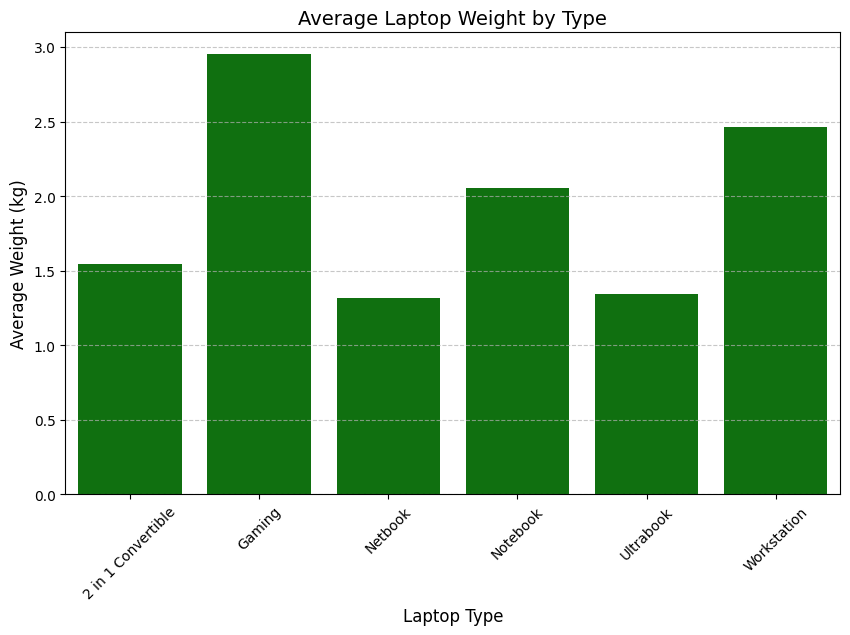

In [47]:
import seaborn as sns

# calculate the average weight by laptop type
type_weight_avg = df.groupby('TypeName')['Weight (kg)'].mean().reset_index()

#Identifying the laptop type with the lowest average weight
min_weight_type = type_weight_avg.loc[type_weight_avg['Weight (kg)'].idxmin()]
print(f"The laptop type with the lowest average weight is: {min_weight_type['TypeName']} with an average weight of {min_weight_type['Weight (kg)']:.2f} kg.")

# bar plot that will show average weight by laptop type (include titles, color, font size, style)
plt.figure(figsize=(10, 6))
sns.barplot(data=type_weight_avg, x='TypeName', y='Weight (kg)', color='green')
plt.title("Average Laptop Weight by Type", fontsize=14)
plt.xlabel("Laptop Type", fontsize=12)
plt.ylabel("Average Weight (kg)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



we can see that the laptop type with the lowest average weight is Netbook and the laptop type with the highest average weight is gaming

Q2- Is there a relationship between the laptop weight and its price?

The correlation between laptop weight and price is: 0.21


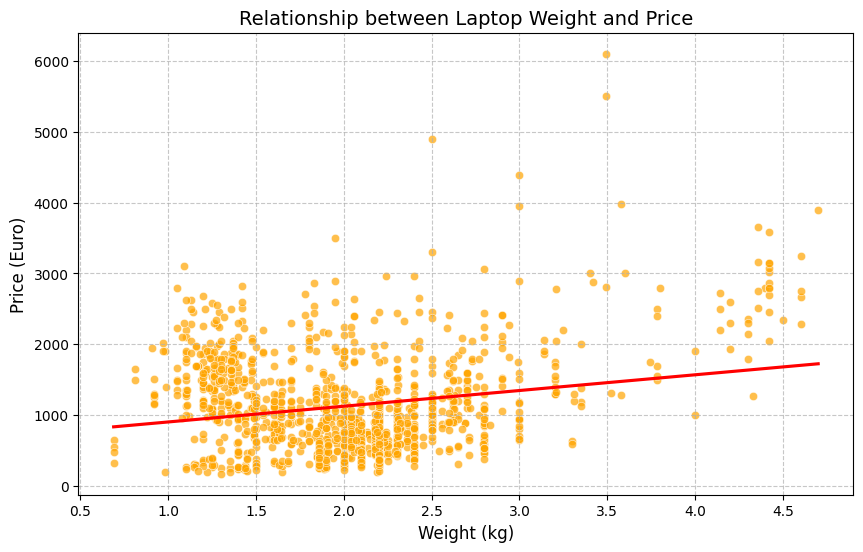

In [48]:

# calculate thr correlation between the laptop weight and its price
correlation = df['Weight (kg)'].corr(df['Price (Euro)'])
print(f"The correlation between laptop weight and price is: {correlation:.2f}")

# scatter plot that will show the connection between both of them 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Weight (kg)', y='Price (Euro)', color='orange', alpha=0.7)

#Adding a linear trend line
sns.regplot(data=df, x='Weight (kg)', y='Price (Euro)', scatter=False, color='red', ci=None)

plt.title("Relationship between Laptop Weight and Price", fontsize=14)
plt.xlabel("Weight (kg)", fontsize=12)
plt.ylabel("Price (Euro)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


we can see that there is a positive correlation between the laptop weight and its price but the correlation is very weak- 0.21